# **Flight Ticket Price Prediction**

## Preprocessing

In [99]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from scipy import stats as st
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PRML Bonus Project/FlightDataset.csv')
df.dropna(inplace=True)

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [100]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [101]:
l=[]
for i in df['Arrival_Time']:
    l.append(i[:5])

df['Arrival_Time'] = l

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [102]:
l=[]
for i in df['Route']:
    l.append(len(i.split('→'))-2)

df['Total_Stops'] = l
df.drop(['Route'], inplace=True, axis=1)

df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302


In [103]:
l = []

for i in df['Duration']:
    i = i.lower()
    x = i.split()
    hrs=0
    mins=0
    if len(x)==2:
        hrs = int(x[0][:-1])
        mins = int(x[1][:-1])
    else:
        if x[0][-1]=='h':
            hrs = int(x[0][:-1])
        else:
            mins = int(x[0][:-1])
    mins += hrs*60

    l.append(mins)

df['Duration'] = l

df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,285,1,No info,13302


In [104]:
cont = ['Duration','Total_Stops','Price']

for f in df.columns:
    if f not in cont:
        df[f] = preprocessing.LabelEncoder().fit_transform(df[f])

df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,211,12,170,0,8,3897
1,1,6,3,0,31,104,445,2,8,7662
2,4,43,2,1,70,30,1140,2,8,13882
3,3,10,3,0,164,217,325,1,8,6218
4,3,0,0,5,149,194,285,1,8,13302


In [105]:
Y = df['Price']
X = df.drop(['Price'],axis=1)

X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.3, random_state=42)
X_train, X_val, Y_train, Y_val = tts(X_train, Y_train, test_size=0.25, random_state=42)

## Training Different Models

In [106]:
def eval(Y, preds):
    r2 = metrics.r2_score(Y, preds)
    mse = metrics.mean_squared_error(Y, preds)
    mae = metrics.mean_absolute_error(Y, preds)
    return [r2, mse, mae]

In [107]:
models = []
r2_scores = []
mses = []
maes = []

### Decision Tree Regressor

In [108]:
DTR = DecisionTreeRegressor(max_depth=5)

DTR.fit(X_train, Y_train)
dtr_preds = DTR.predict(X_val)

dtr_eval = eval(Y_val, dtr_preds)

models.append('Decision Tree Regressor')
r2_scores.append(dtr_eval[0])
mses.append(dtr_eval[1])
maes.append(dtr_eval[2])

print('\nEvaluation Metrics for Decision Tree Regressor:\n')
print(f'R2 Score : {dtr_eval[0]}')
print(f'Mean Squared Error : {dtr_eval[1]}')
print(f'Mean Absolute Error : {dtr_eval[2]}')


Evaluation Metrics for Decision Tree Regressor:

R2 Score : 0.6443701185456618
Mean Squared Error : 6905176.630957661
Mean Absolute Error : 1680.3245705408592


### Random Forest Regressor

In [109]:
RFR = RandomForestRegressor(random_state=0)

RFR.fit(X_train, Y_train)
rfr_preds = RFR.predict(X_val)

rfr_eval = eval(Y_val, rfr_preds)

models.append('Random Forest Regressor')
r2_scores.append(rfr_eval[0])
mses.append(rfr_eval[1])
maes.append(rfr_eval[2])

print('Evaluation Metrics for Random Forest Regressor:\n')
print(f'R2 Score : {rfr_eval[0]}')
print(f'Mean Squared Error : {rfr_eval[1]}')
print(f'Mean Absolute Error : {rfr_eval[2]}')

Evaluation Metrics for Random Forest Regressor:

R2 Score : 0.8001420365378048
Mean Squared Error : 3880592.1852411483
Mean Absolute Error : 967.1880902088108


### Gradient Boosting Regressor

In [110]:
GBR = GradientBoostingRegressor()

GBR.fit(X_train, Y_train)
gbr_preds = GBR.predict(X_val)

gbr_eval = eval(Y_val, gbr_preds)

models.append('Gradient Boosting Regressor')
r2_scores.append(gbr_eval[0])
mses.append(gbr_eval[1])
maes.append(gbr_eval[2])

print('\nEvaluation Metrics for Gradient Boosting Regressor:\n')
print(f'R2 Score : {gbr_eval[0]}')
print(f'Mean Squared Error : {gbr_eval[1]}')
print(f'Mean Absolute Error : {gbr_eval[2]}')


Evaluation Metrics for Gradient Boosting Regressor:

R2 Score : 0.8045517563482689
Mean Squared Error : 3794969.756496512
Mean Absolute Error : 1328.530024460585


### Linear Regressor

In [111]:
LR = LinearRegression()

LR.fit(X_train, Y_train)
lr_preds = LR.predict(X_val)

lr_eval = eval(Y_val, lr_preds)

models.append('Linear Regressor')
r2_scores.append(lr_eval[0])
mses.append(lr_eval[1])
maes.append(lr_eval[2])

print('\nEvaluation Metrics for Linear Regressor:\n')
print(f'R2 Score : {lr_eval[0]}')
print(f'Mean Squared Error : {lr_eval[1]}')
print(f'Mean Absolute Error : {lr_eval[2]}')


Evaluation Metrics for Linear Regressor:

R2 Score : 0.40523226630123266
Mean Squared Error : 11548456.61109527
Mean Absolute Error : 2486.2073727410166


### Light GBM Regressor

In [112]:
LGBM = LGBMRegressor()

LGBM.fit(X_train, Y_train)
lgbm_preds = LGBM.predict(X_val)

lgbm_eval = eval(Y_val,lgbm_preds)

models.append('LightGBM Regressor')
r2_scores.append(lgbm_eval[0])
mses.append(lgbm_eval[1])
maes.append(lgbm_eval[2])

print('\nEvaluation Metrics for LightGBM Regressor:\n')
print(f'R2 Score : {lgbm_eval[0]}')
print(f'Mean Squared Error : {lgbm_eval[1]}')
print(f'Mean Absolute Error : {lgbm_eval[2]}')


Evaluation Metrics for LightGBM Regressor:

R2 Score : 0.8504702497481678
Mean Squared Error : 2903381.832958997
Mean Absolute Error : 1049.2408243974633


### XGBoost Regressor

In [113]:
XGB = XGBRegressor(n_estimators=450, max_depth=5)

XGB.fit(X_train, Y_train)
xgb_preds = XGB.predict(X_val)

xgb_eval = eval(Y_val, xgb_preds)

models.append('XGBoost Regressor')
r2_scores.append(xgb_eval[0])
mses.append(xgb_eval[1])
maes.append(xgb_eval[2])

print('\nEvaluation Metrics for XGBoost Regressor:\n')
print(f'R2 Score : {xgb_eval[0]}')
print(f'Mean Squared Error : {xgb_eval[1]}')
print(f'Mean Absolute Error : {xgb_eval[2]}')

[17:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Evaluation Metrics for XGBoost Regressor:

R2 Score : 0.8762529183407313
Mean Squared Error : 2402766.19312291
Mean Absolute Error : 879.693127898354


## Comparisons

In [114]:
comparison_mat = pd.DataFrame({'Models':models, 'R2 Score':r2_scores,'Mean Squared Error':mses, 'Mean Absolute Error':maes})
comparison_mat.set_index('Models', inplace=True)

comparison_mat

,R2 Score,Mean Squared Error,Mean Absolute Error
Models,,,
Decision Tree Regressor,0.644370,6.905177e+06,1680.324571
Random Forest Regressor,0.800142,3.880592e+06,967.188090
Gradient Boosting Regressor,0.804552,3.794970e+06,1328.530024
Linear Regressor,0.405232,1.154846e+07,2486.207373
LightGBM Regressor,0.850470,2.903382e+06,1049.240824
XGBoost Regressor,0.876253,2.402766e+06,879.693128


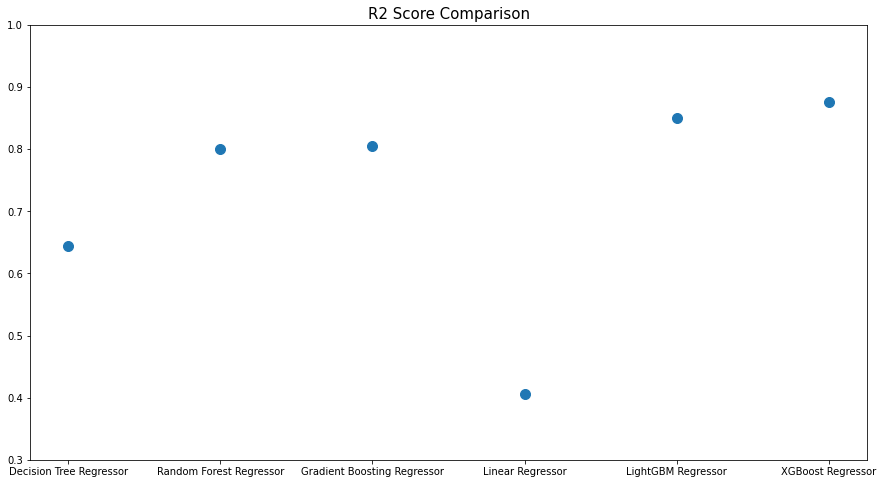

In [123]:
plt.figure(figsize=(15,8))
plt.title('R2 Score Comparison', fontsize=15)
plt.scatter(models, r2_scores, s=100)
plt.ylim(0.3,1)
plt.show()

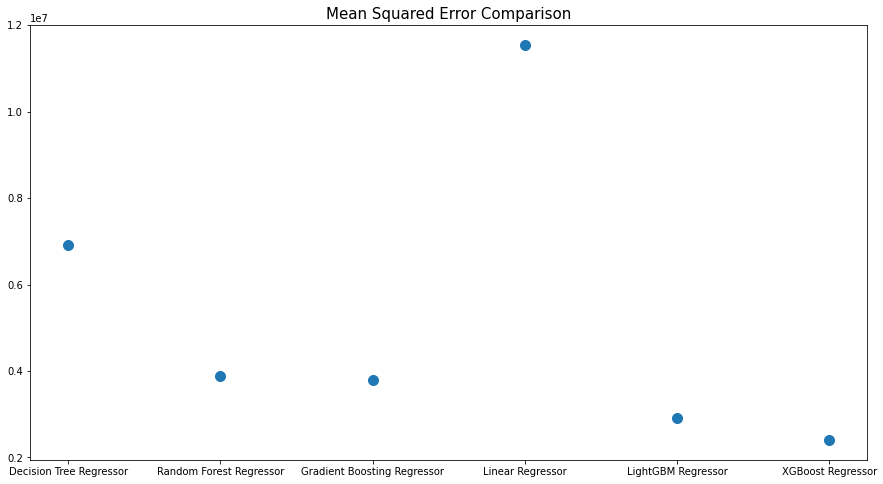

In [124]:
plt.figure(figsize=(15,8))
plt.title('Mean Squared Error Comparison', fontsize=15)
plt.scatter(models, mses, s=100)
plt.show()

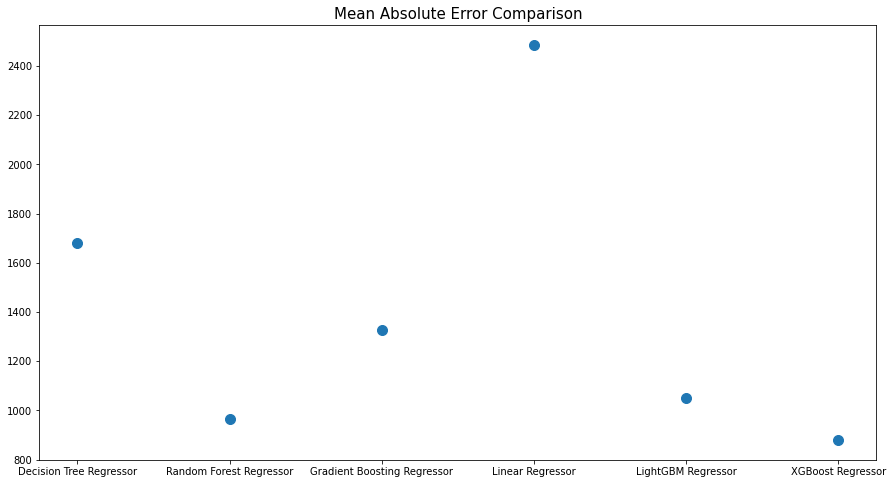

In [125]:
plt.figure(figsize=(15,8))
plt.title('Mean Absolute Error Comparison', fontsize=15)
plt.scatter(models, maes, s=100)
plt.show()

## **Final Model**

In [126]:
X_train = pd.concat([X_train, X_val])
Y_train = pd.concat([Y_train, Y_val])

In [128]:
final_model = XGBRegressor(n_estimators=450, max_depth=5)

final_model.fit(X_train, Y_train)
final_preds = final_model.predict(X_test)

final_eval = eval(Y_test, final_preds)

print('\nFinal Evaluation Metrics for XGBoost Regressor on Testing Dataset:\n')
print(f'R2 Score : {final_eval[0]}')
print(f'Mean Squared Error : {final_eval[1]}')
print(f'Mean Absolute Error : {final_eval[2]}')

[17:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Final Evaluation Metrics for XGBoost Regressor on Testing Dataset:

R2 Score : 0.8819101150443799
Mean Squared Error : 2409143.072740256
Mean Absolute Error : 856.9164894711023


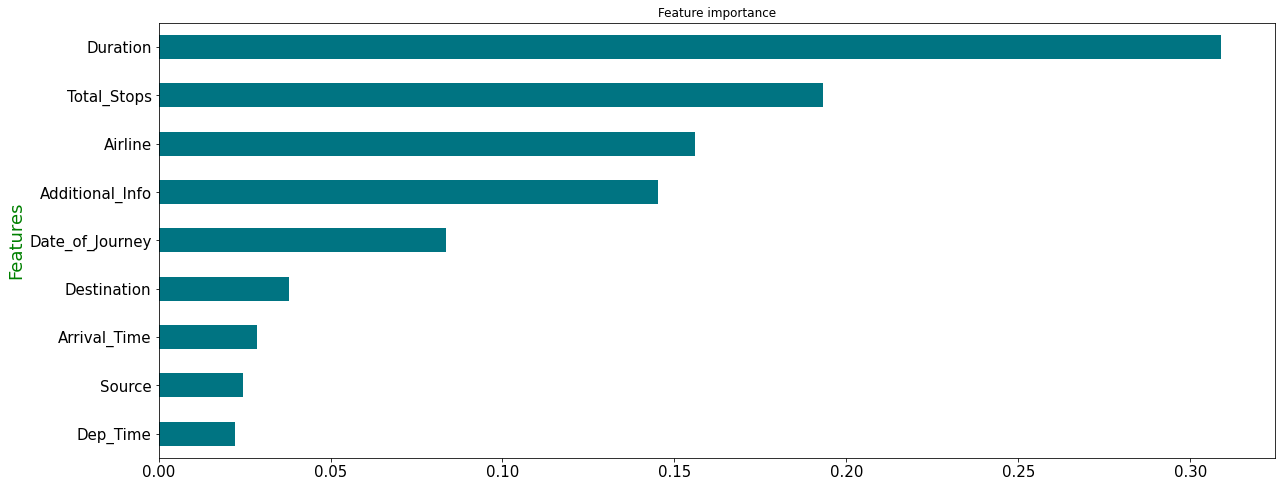

In [129]:
importance = pd.Series(final_model.feature_importances_,index=X_train.columns).sort_values()
ax = importance.plot.barh(color = '#007482', fontsize = 15)
ax.set(title = 'Feature importance')
ax.set_ylabel('Features', color = 'g', fontsize = '18')
ax.figure.set_size_inches(20, 8)
plt.show()